# LinearRegression Model to predict delivery time 

# Model For dlivery time prediction from sorting time

In [2]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [3]:
DevT=pd.read_csv("delivery_time.csv")

In [4]:
print(DevT.head(10))


   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10
5          15.35             6
6          19.00             7
7           9.50             3
8          17.90            10
9          18.75             9


In [5]:
DevT.columns=['delt','sortt']

In [6]:
DevT.head(10)

,delt,sortt
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Text(0, 0.5, 'Delivery Time')

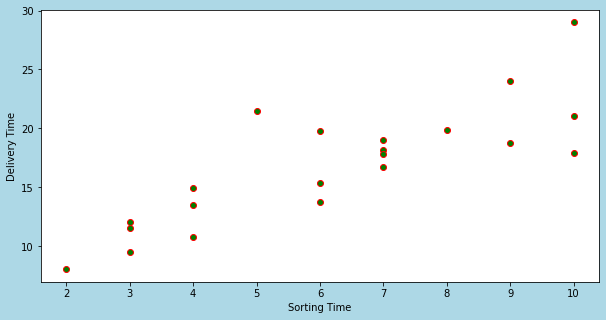

In [7]:
plt.figure(figsize=(10,5),facecolor="lightblue")
plt.scatter(DevT.sortt,DevT.delt,facecolor='green',edgecolor='red')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [8]:
DevT.corr()

,delt,sortt
delt,1.000000,0.825997
sortt,0.825997,1.000000


In [9]:
ln=LinearRegression()
X=DevT[['sortt']]
Y=DevT[['delt']]
ln.fit(X,Y)

LinearRegression()

In [10]:
ln.intercept_

array([6.58273397])

In [11]:
ln.coef_

array([[1.6490199]])

In [12]:
ln.predict(X)

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

Text(0, 0.5, 'Delivery Time')

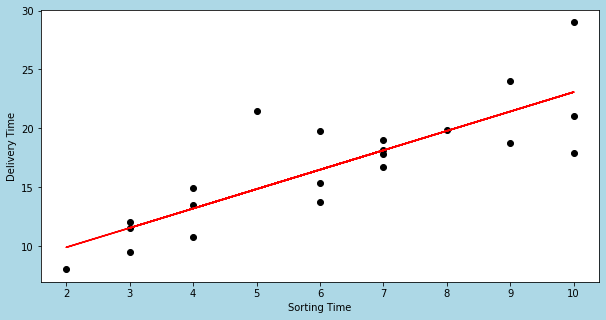

In [13]:
plt.figure(figsize=(10,5),facecolor="lightblue")
plt.scatter(DevT.sortt,DevT.delt,facecolor='black')
plt.plot(DevT.sortt,ln.predict(X),color="red")
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

# Model Validation 

In [14]:
pred_val=ln.predict(X)
r2_score(DevT.delt,pred_val)

0.6822714748417231

# R value is 0.682,so its good fit but there will be some chances of imrovement 

# Prediction Model for Salry hike

In [16]:
SalH=pd.read_csv("Salary_Data.csv")

In [17]:
SalH.shape

(30, 2)

In [18]:
SalH.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [19]:
SalH.columns=['yexp','sal']


In [20]:
SalH.head(10)

,yexp,sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Text(0, 0.5, 'Salary')

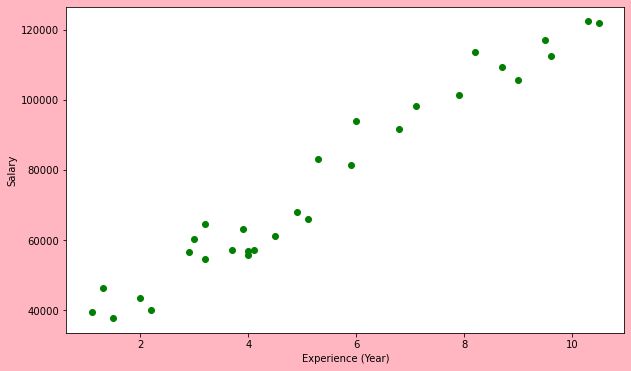

In [21]:
plt.figure(figsize=(10,6),facecolor='lightpink')
plt.scatter(SalH.yexp,SalH.sal,facecolor='green')
plt.xlabel("Experience (Year)")
plt.ylabel("Salary")


In [22]:
SalH.corr()

,yexp,sal
yexp,1.000000,0.978242
sal,0.978242,1.000000


In [23]:
lr=LinearRegression()
X1=SalH[['yexp']]
Y=SalH[['sal']]
lr.fit(X1,Y)

LinearRegression()

In [24]:
lr.coef_

array([[9449.96232146]])

In [25]:
lr.intercept_

array([25792.20019867])

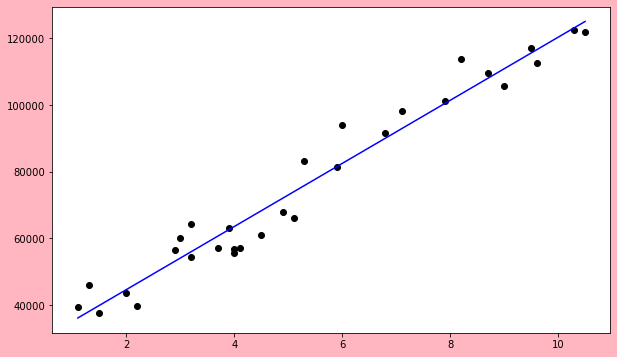

In [26]:
pre=lr.predict(X1)
plt.figure(figsize=(10,6),facecolor="lightpink")
plt.scatter(SalH.yexp,SalH.sal,facecolor='black')

plt.plot(SalH.yexp,pre,color='blue')


In [30]:
a=lr.predict(X1)
R_value=r2_score(SalH.sal,a)
R_value

0.9569566641435086

# the above model gave R value 0.956 which is very close to 1 so above model is best fit for predicting Salary Hike 

# model for sorting time and delivery time with statsmodels

In [28]:
mymodel=smf.ols("delt~sortt",data=DevT).fit()

In [29]:
mymodel.params

Intercept    6.582734
sortt        1.649020
dtype: float64

In [30]:
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   delt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           3.98e-06
Time:                        12:51:12   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
sortt          1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
mymodel2=smf.ols('sortt~np.log(delt)',data=DevT).fit()
mymodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sortt   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           1.59e-06
Time:                        12:52:21   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(delt)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
mymodel3=smf.ols('np.log(sortt)~delt',data=DevT).fit()
mymodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(sortt)   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           2.64e-06
Time:                        12:52:21   Log-Likelihood:               -0.85600
No. Observations:                  21   AIC:                             5.712
Df Residuals:                      19   BIC:                             7.801
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4372      0.204      2.139      0.046       0.009       0.865
delt           0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
DevT["Sort_sq"]=DevT.sortt**2
model_squad=smf.ols("np.log(delt)~sortt+Sort_sq",data=DevT).fit()
model_squad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(delt)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           2.20e-06
Time:                        12:58:50   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
sortt          0.2659      0.080      3.315      0.004       0.097       0.434
Sort_sq       -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
print("By above 4 models the fit fot delivery time prediction model is ,model_squad with R value 0.765")

By above 4 models the fit fot delivery time prediction ,model_squad is good


# model for salary hike with statsmodels

In [40]:
model1_sal=smf.ols("yexp~np.log(sal)",data=SalH).fit()
model1_sal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   yexp   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           7.03e-18
Time:                        13:12:02   Log-Likelihood:                -33.035
No. Observations:                  30   AIC:                             70.07
Df Residuals:                      28   BIC:                             72.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -77.6961      4.241    -18.322      0.000     -86.383     -69.009
np.log(sal)     7.4288      0.379     19.585      0.000       6.652       8.206
==============================================================================
Omnibus:                        1.748   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.213
Skew:                          -0.227   Prob(JB):                        0.545
Kurtosis:                       2.126   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# R value is 0.932 ,which is very close to 1 ,so our model is best fit for predicting salary hike